In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [4]:
train_loader = torch.utils.data.DataLoader(
    train_set,batch_size=100)#查看图片，数据集加载数量batch_size

In [5]:
train_loader

In [6]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

In [7]:
len(train_set)

60000

In [8]:
train_set.train_labels

E:\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [10]:
sample = next(iter(train_set))

In [11]:
len(sample)

2

In [12]:
type(sample)

tuple

In [13]:
image,label = sample

In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
label.shape

AttributeError: 'int' object has no attribute 'shape'

label: 9


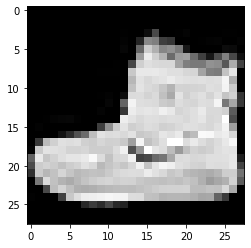

In [16]:
plt.imshow(image.squeeze(),cmap='gray')
print('label:',label)

In [17]:
batch = next(iter(train_loader))

In [18]:
len(batch)

2

In [19]:
type(batch)

list

In [29]:
images,labels = batch

In [30]:
images.shape

torch.Size([100, 1, 28, 28])

In [31]:
labels.shape

torch.Size([100])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


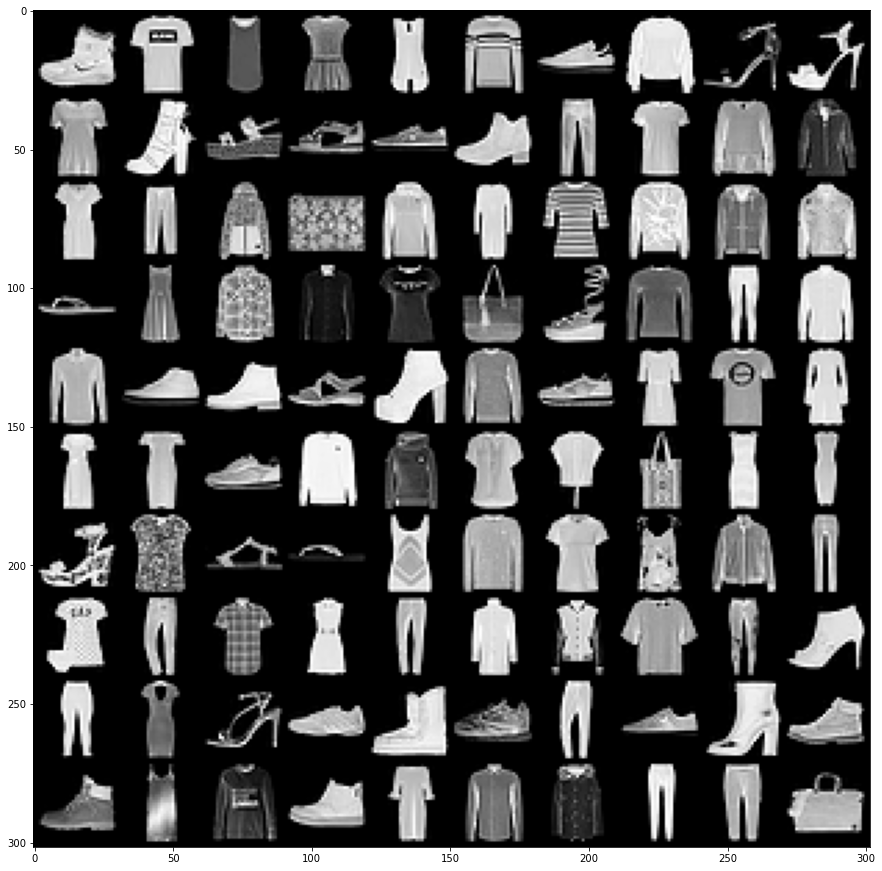

In [32]:
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,25))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:',labels)

In [33]:
class Network:
    def __init__(self):
        self.layer = None
    def forward(self,t):
        t = self.layer(t)
        return t

In [34]:
import torch.nn as nn


In [35]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        #两个复合层
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
        #三个全连接
    def forward(self,t):
        return t

In [36]:
network = Network()
network


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [37]:
class Network():#nn.Module
    def __init__(self):
        #super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        #两个复合层
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
        #三个全连接
    def forward(self,t):
        #输入层
        t = t
        #隐藏层
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #隐藏层
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #隐藏层
        t = t.reshape(-1,12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        #隐藏层
        t =self.fc2(t)
        t = F.relu(t)
        #输出层
        t = self.out(t)
        #t =F.softmax(t,dim=1)
        return t
    def __repr__(self):#覆盖
        return "lizardnet"

In [38]:
network = Network()

In [39]:
print(network)

lizardnet


In [40]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [41]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [24]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        #两个复合层
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
        #三个全连接
    def forward(self,t):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = t.reshape(-1,12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        t =self.fc2(t)
        t = self.out(t)
        return t


NameError: name 'nn' is not defined

In [25]:
import torch.nn.functional as F

In [146]:
torch.set_grad_enabled(False)#特征关闭

In [147]:
network = Network()

In [148]:
sample = next(iter(train_set))

In [149]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [150]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [151]:
pred = network(image.unsqueeze(0))

In [152]:
pred.shape

torch.Size([1, 10])

In [153]:
pred

tensor([[-0.1039, -0.0175, -0.0494,  0.0743,  0.0172,  0.1318, -0.0329,  0.1250, -0.1254, -0.0644]])

In [154]:
label

9

In [155]:
pred.argmax(dim=1)

tensor([5])

In [156]:
F.softmax(pred,dim=1)

tensor([[0.0902, 0.0983, 0.0953, 0.1078, 0.1018, 0.1142, 0.0968, 0.1134, 0.0883, 0.0938]])

In [157]:
F.softmax(pred,dim=1).sum()

tensor(1.)

In [158]:
net1 = Network()

In [159]:
net1(image.unsqueeze(0))

tensor([[ 0.0362,  0.0368, -0.1214, -0.1485,  0.0519, -0.0196, -0.0068, -0.0649, -0.0627, -0.0900]])

In [160]:
net2 = Network()

In [161]:
net2(image.unsqueeze(0))

tensor([[-0.0809,  0.0679, -0.0677,  0.1033,  0.0014,  0.0359, -0.0344, -0.1009, -0.0132,  0.0675]])

In [162]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10
)

In [163]:
batch = next(iter(data_loader))

In [164]:
images, labels = batch

In [166]:
image.shape

torch.Size([1, 28, 28])

In [179]:
preds = network(images)

In [180]:
preds.shape

torch.Size([10, 10])

In [181]:
preds

tensor([[-0.1039, -0.0175, -0.0494,  0.0743,  0.0172,  0.1318, -0.0329,  0.1250, -0.1254, -0.0644],
        [-0.1111, -0.0258, -0.0613,  0.0912,  0.0156,  0.1271, -0.0357,  0.1030, -0.1385, -0.0636],
        [-0.0959, -0.0339, -0.0472,  0.0788,  0.0109,  0.0976, -0.0208,  0.1161, -0.1377, -0.0673],
        [-0.0997, -0.0307, -0.0485,  0.0780,  0.0136,  0.1031, -0.0210,  0.1143, -0.1362, -0.0684],
        [-0.1023, -0.0286, -0.0516,  0.0970,  0.0116,  0.1146, -0.0282,  0.1129, -0.1318, -0.0675],
        [-0.1060, -0.0239, -0.0560,  0.0857,  0.0145,  0.1156, -0.0310,  0.1173, -0.1267, -0.0634],
        [-0.1196, -0.0252, -0.0520,  0.0749,  0.0232,  0.1078, -0.0312,  0.1094, -0.1380, -0.0747],
        [-0.1016, -0.0232, -0.0647,  0.0872,  0.0112,  0.1124, -0.0376,  0.1244, -0.1222, -0.0671],
        [-0.1049, -0.0158, -0.0452,  0.0663,  0.0128,  0.1149, -0.0194,  0.1283, -0.1372, -0.0710],
        [-0.1074, -0.0139, -0.0445,  0.0560,  0.0080,  0.1160, -0.0269,  0.1440, -0.1350, -0.0655]])

In [182]:
preds.argmax(dim=1)

tensor([5, 5, 7, 7, 5, 7, 7, 7, 7, 7])

In [183]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [184]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False,  True, False, False, False])

In [185]:
preds.argmax(dim=1).eq(labels).sum()

tensor(1)

In [186]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [187]:
get_num_correct(preds, labels)

1